## import data

In [1]:
# "","T_Blackbody Ave. (C)","T_InsideLeft Ave. (C)","T_InsideRight Ave. (C)","T_Outside Ave. (C)"

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("stefan_boltzmann_data.csv")
# data.info()

# read data in Kelvin
time = data.time
temp_boltzmann = data.T_Blackbody + 273.15
temp_inside_left = data.T_InsideLeft + 273.15
temp_inside_right = data.T_InsideRight + 273.15
temp_outside = data.T_Outside + 273.15

# get from "HH:MM:SS" to minutes
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h*60 + m + s/60

time_in_minutes = [time_to_minutes(time) for time in time]
time = pd.Series(time_in_minutes)

## calculation of Stefan-Boltzmann constant by every measurement point

In [9]:
# calculate last 15 datapoints (temp blackbody) 
import numpy as np

selection = [[382,397], [733,748], [1046,1061], [1375,1390], [1660,1675], [2067,2082], [2382,2397]]

T4_T4 = []
T4_H = []
T4_U = []
temperature_averages = []
temperature_umgebung_aussen = []
temperature_umgebung_innen = []
temperature_u = []

stat_temperature_averages = []
stat_temperature_umgebung_aussen = []
stat_temperature_umgebung_innen = []
# print(temp_boltzmann)

for i,e in enumerate(selection):
    selected_rows_boltzmann = temp_boltzmann.iloc[e[0]:e[1]]
    selected_rows_inside_left = temp_inside_left.iloc[e[0]:e[1]]
    selected_rows_inside_right = temp_inside_right.iloc[e[0]:e[1]]
    selected_rows_outside = temp_outside.iloc[e[0]:e[1]]
    
    stat_temperature_averages.append(np.std(selected_rows_boltzmann) / np.sqrt(e[1] - e[0]))
    stat_temperature_umgebung_aussen.append(np.std(selected_rows_outside) / np.sqrt(e[1] - e[0]))
    stat_temperature_umgebung_innen.append(np.std((selected_rows_inside_left+selected_rows_inside_right)/2) / np.sqrt(e[1] - e[0]))
    
    temperature_averages.append(np.average(selected_rows_boltzmann))
    temperature_umgebung_aussen.append(np.average(selected_rows_outside)) 
    temperature_umgebung_innen.append((np.average(selected_rows_inside_left) + np.average(selected_rows_inside_right)) / 2)
    temperature_u.append((np.average((selected_rows_inside_left)+np.average(selected_rows_inside_right))/2))
    T4_T4.append(np.average(selected_rows_boltzmann)**4-((np.average((selected_rows_inside_left)+np.average(selected_rows_inside_right))/2)**4))
    T4_H.append(np.average(selected_rows_boltzmann)**4)
    T4_U.append(((np.average((selected_rows_inside_left)+np.average(selected_rows_inside_right))/2)**4) )
    
    


T4_T4_combined = list((np.array(T4_H) - np.array(T4_U)))

print("temperature_averages\t\t",temperature_averages)
print("temperature_umgebung_aussen\t", temperature_umgebung_aussen)
print("temperature_umgebung_innen\t", temperature_umgebung_innen) # das muss ich verwenden für T_U^4
print("temperature_u\t\t\t", temperature_u)
print("T4_H\t\t\t\t", T4_H)
print("T4_U\t\t\t\t", T4_U)
print("T4_T4_combined\t\t\t", T4_T4_combined, "\n")
print("stat heizer\t", stat_temperature_averages)
print("stat umgebu out\t", stat_temperature_umgebung_aussen)
print("stat umgebu in\t", stat_temperature_umgebung_innen)

temperature_averages		 [423.6806666666666, 475.6899999999998, 523.9586666666668, 568.044, 609.2846666666666, 646.2406666666666, 685.0960000000001]
temperature_umgebung_aussen	 [299.90599999999995, 301.50466666666665, 303.20933333333323, 305.19, 307.13399999999996, 309.75000000000006, 312.28333333333336]
temperature_umgebung_innen	 [300.875, 302.957, 305.2639999999999, 307.94333333333327, 310.6966666666666, 314.12166666666667, 317.6186666666666]
temperature_u			 [300.875, 302.95700000000005, 305.26399999999995, 307.94333333333327, 310.6966666666667, 314.1216666666667, 317.6186666666666]
T4_H				 [32222155351.420372, 51203080144.7687, 75368194790.20444, 104118501199.82591, 137810083231.18637, 174412310505.7148, 220295551517.69]
T4_U				 [8194914241.992432, 8424108781.588693, 8683651040.27494, 8992557551.435558, 9318507855.781786, 9736246758.643688, 10177100732.288845]
T4_T4_combined			 [24027241109.42794, 42778971363.18001, 66684543749.9295, 95125943648.39035, 128491575375.40459, 1646760

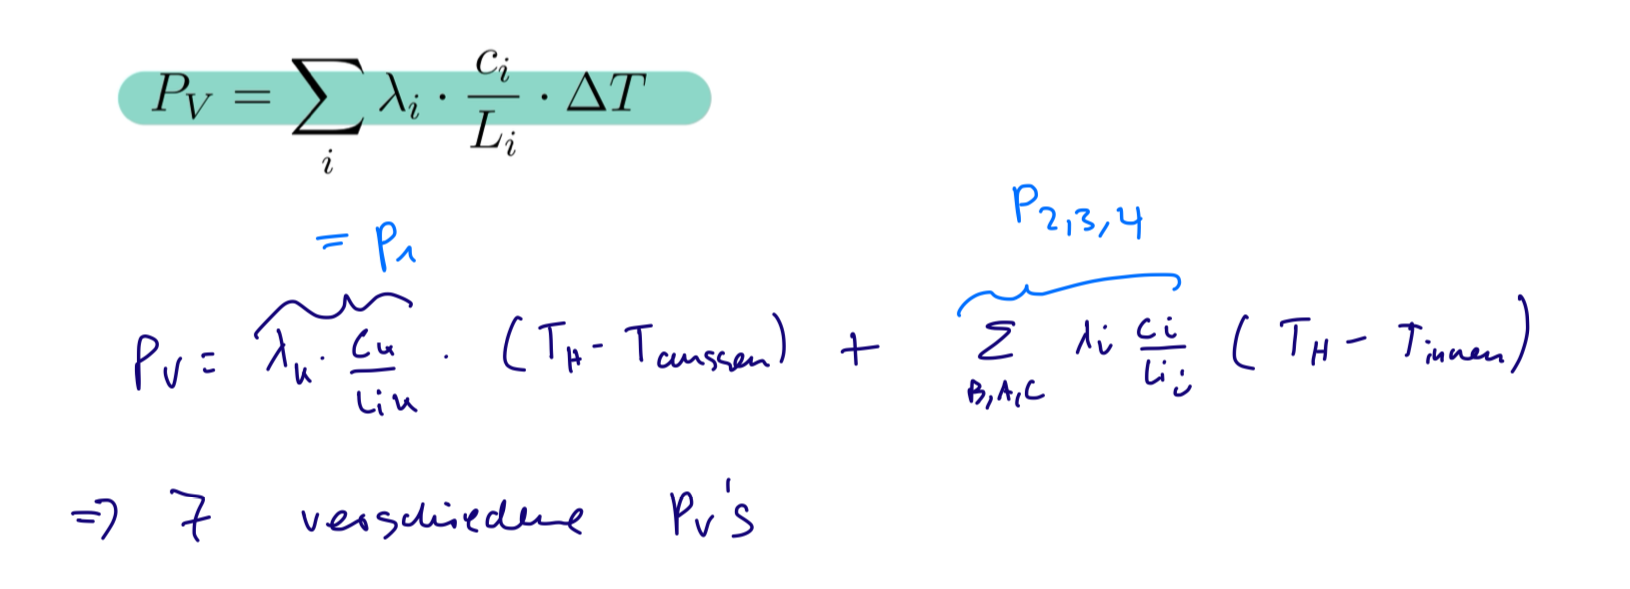

In [10]:
# calculation of Stefan-Boltzmann constant by every measurement point

# # P_V
# # lambda = leitfaehigkeit
# # c = durchmesser / fläche
# # L = laenge

material = np.array([6.,2.,1.,1.])
leitfaehigkeit = np.array([390, 69.9, 29.7, 19.2])
durchmesser = (np.array([0.00028, 0.00026, 0.0002, 0.0002])/2)**2 * np.pi # umgerechnet in Querschnittsfläche
laenge = np.array([0.016,0.020,0.030,0.030])

U = np.array([3,4,5,6,7,8,9]) # eingestellte Spannungen und Stromstärken
I = np.array([0.96,1.279,1.592,1.898,2.208,2.504,2.789]) # eingestellte Spannungen und Stromstärken
A = 1899.4 * (1/(10**6)) # Fläche Schwarzkörper
epsilon = 1 # idealer Schwarzkörper
# P_V = 0
numpy_T4_T4 = np.array(T4_T4)

pv_correct = []
for i in range(7):
    pv_first_part = (material[0]*leitfaehigkeit[0]*durchmesser[0]/laenge[0])*(temperature_averages[i]-temperature_umgebung_aussen[i])
    pv_second_part = (material[1:4]*leitfaehigkeit[1:4]*durchmesser[1:4]/laenge[1:4])*(temperature_averages[i]-temperature_umgebung_innen[i])
    pv_correct.append(pv_first_part + np.sum(pv_second_part))
    
PV = np.array(pv_correct)

def stefan_boltzmann_constant(U,I, P_V,A,epsilon, T4_T4):
    return (U*I - P_V) / (A*epsilon*T4_T4)


stefan_boltzmann_constant(U,I,PV,A,epsilon, numpy_T4_T4)

# calculating 
print("individual sigma values:", stefan_boltzmann_constant(U,I,PV,A,epsilon,numpy_T4_T4))
print("average sigma:          ", np.average(stefan_boltzmann_constant(U,I,PV,A,epsilon,numpy_T4_T4)))
print("error sigma:            ", np.std(stefan_boltzmann_constant(U,I,PV,A,epsilon,numpy_T4_T4)))

individual sigma values: [3.75459744e-08 4.27601058e-08 4.64209675e-08 4.93189288e-08
 5.16638457e-08 5.39075522e-08 5.40930622e-08]
average sigma:           4.79586338035751e-08
error sigma:             5.687234152602199e-09


## calculation of Stefan-Boltzmann constant by fitting a curve

Fitted linear function parameters: slope = 5.69e-08, intercept = -607.0
error of sigma: 6.608002503944575e-10


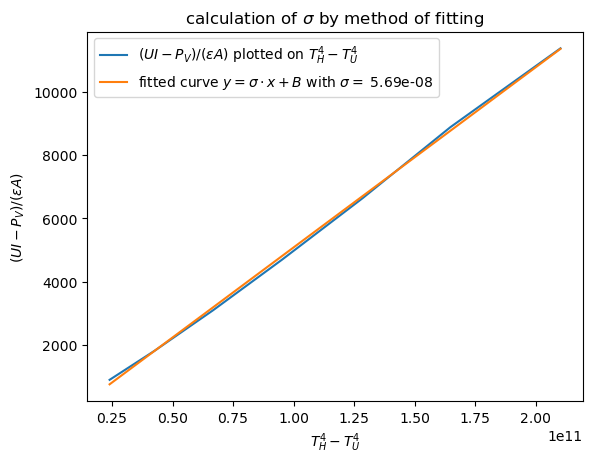

In [11]:
from math import log10, floor
from scipy.optimize import curve_fit

def y_achse(U,I,PV,A,epsilon):
    return (U*I - PV) / (epsilon*A)

x_achse = (np.array(T4_T4))
y_achse = y_achse(U,I,PV,A,epsilon)

def linear_fit(a,x, b):
    return a*x + b

# Perform the curve fitting
popt, pcov = curve_fit(linear_fit, x_achse, y_achse)

# The optimal parameters (slope and intercept) would be in 'popt':
slope = popt[0]
intercept = popt[1]

rounded_slope = round(slope, 3 - int(floor(log10(abs(slope)))) - 1)
rounded_intercept = round(intercept, 3 - int(floor(log10(abs(intercept)))) - 1)

print(f"Fitted linear function parameters: slope = {rounded_slope}, intercept = {rounded_intercept}")


# Berechnung des Standardfehlers der Steigung (Fehler von \sigma).
# p_cov alleine wäre varianz -> deswegen sqrt()
sigma_error = np.sqrt((pcov[0, 0])) 

print(f"error of sigma: {sigma_error}")

plt.plot(x_achse, y_achse, label=r"$(UI - P_V) / (\epsilon A)$ plotted on $T^4_{H} - T^4_{U}$")
plt.plot(x_achse, linear_fit(slope, x_achse, intercept), label=r'fitted curve $y = \sigma \cdot x + B$ with $\sigma =$ %s' % (rounded_slope))
plt.title(r'calculation of $\sigma$ by method of fitting')
plt.xlabel(r"$T^4_{H} - T^4_{U}$")
plt.ylabel(r"$(UI - P_V) / (\epsilon A)$")
plt.legend()
plt.savefig("linear_bolzz.pdf")
plt.show()


## Calculation of Emissivity ε of Blackbody

In [12]:
def emissivity(U,I,PV,A,sigma,T4_T4):
    return (U*I - PV) / (A*sigma*T4_T4)


sigma_literaturwert = 5.670367*10**(-8)
emissivity(U, I, PV, A, sigma_literaturwert, np.array(T4_T4))

print("average of epsilon:", np.average(emissivity(U, I, PV, A, sigma_literaturwert, np.array(T4_T4))))
print("error of epsilon:  ", np.std(emissivity(U, I, PV, A, sigma_literaturwert, np.array(T4_T4))))

average of epsilon: 0.8457765397473409
error of epsilon:   0.1002974613918675


## Plots

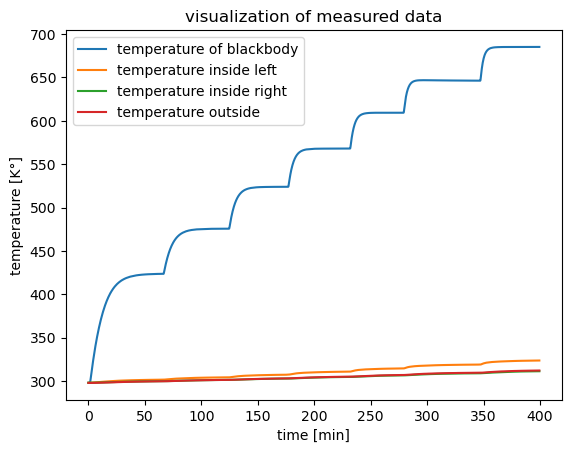

In [13]:
# 1.er plot
plt.plot(time, temp_boltzmann, label="temperature of blackbody")

plt.plot(time, temp_inside_left, label="temperature inside left")
plt.plot(time, temp_inside_right, label="temperature inside right")
plt.plot(time, temp_outside, label="temperature outside")

plt.title('visualization of measured data')
plt.xlabel("time [min]")
plt.ylabel("temperature [K°]")
plt.legend()
plt.show()

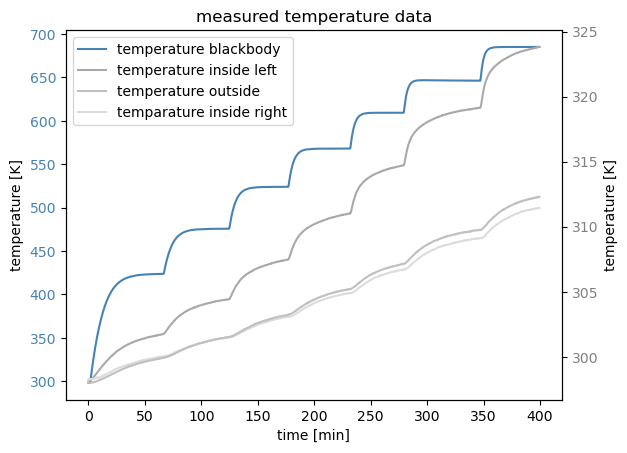

In [22]:
# improved plot
import numpy as np 
import matplotlib.pyplot as plt 

# test
  
  
# Create Plot
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('time [min]') 
ax1.set_ylabel('temperature [K]') 
# ax1.plot(time, temp_boltzmann, color = 'red', label="temperature blackbody") 

plot_1 = ax1.plot(time, temp_boltzmann, color = 'steelblue', label="temperature blackbody")   

ax1.tick_params(axis ='y', labelcolor = 'steelblue') 
#ax1.legend()

# Adding Twin Axes

ax2 = ax1.twinx() 

ax2.set_ylabel('temperature [K]') 

# ax2.plot(time, temp_inside_left, color = 'slateblue', label="temperature inside left") 
# ax2.plot(time, temp_inside_right, color = 'cornflowerblue', label="temparature inside right") 
# ax2.plot(time, temp_outside, color = 'royalblue', label="temperature outside") 

plot_2 = ax2.plot(time, temp_inside_left, color = 'darkgrey', label="temperature inside left") 
plot_3 = ax2.plot(time, temp_inside_right, color = 'gainsboro', label="temparature inside right") 
plot_4 = ax2.plot(time, temp_outside, color = 'silver', label="temperature outside") 

ax2.tick_params(axis ='y', labelcolor = 'gray') 

# legend
plt.title("measured temperature data")
lns = plot_1 + plot_2 + plot_4 + plot_3
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=0)

plt.savefig("data_visualization.pdf")

plt.show()

## Fehlerrechnung \sigma

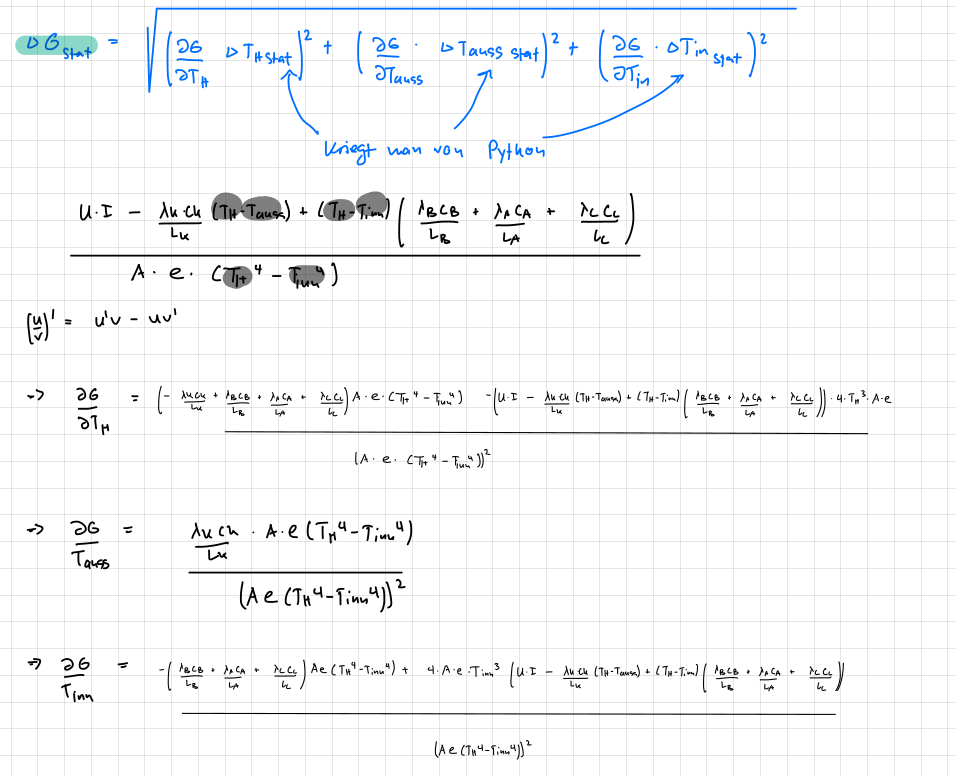

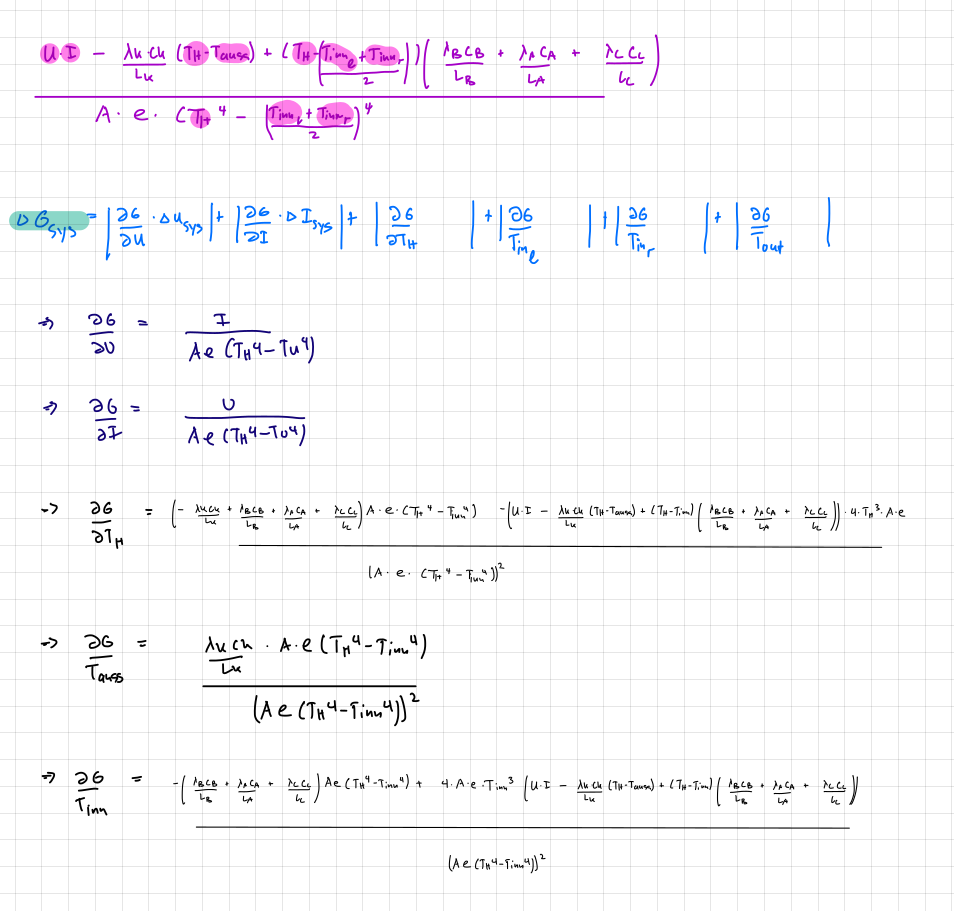

In [17]:
# statistischer Fehler
import numpy as np

lambda_k = 6*390
lambda_b = 2*69.9
lambda_a = 1*29.7
lambda_c = 1*19.2

ck,cb, ca, cc = (np.array([0.00028, 0.00026, 0.0002, 0.0002])/2)**2 * np.pi
Lk,Lb,La,Lc = np.array([0.016,0.020,0.030,0.030])

A = 1899.4 * (1/(10**6)) # Fläche Schwarzkörper
e = 1

T_h = np.array(temperature_averages)
T_inn = np.array(temperature_umgebung_innen)
T_auss = np.array(temperature_umgebung_aussen)

U = np.array([3,4,5,6,7,8,9]) # eingestellte Spannungen und Stromstärken
I = np.array([0.96,1.279,1.592,1.898,2.208,2.504,2.789]) # eingestellte Spannungen und Stromstärken

k_block = lambda_k * ck / Lk
b_block = lambda_b * cb / Lb
a_block = lambda_a * ca / La
c_block = lambda_c * cc / Lc

u = U*I - k_block*(T_h - T_auss) + (T_h - T_inn)*(b_block + a_block + c_block)
v = A*e*(T_h**4 - T_inn**4)



T_H_stat = stat_temperature_averages
T_auss_stat = stat_temperature_umgebung_aussen
T_inn_stat = stat_temperature_umgebung_innen




def Adsigma_dT_H(T_H_stat):
    return ((((-k_block + b_block + a_block + c_block)*(v) - (u)*4*A*e*T_h**3)/(v**2)) * (T_H_stat))
    
def Adsigma_dT_auss(T_auss_stat):   
    return ((k_block*v) / (v**2)) * (T_auss_stat)
    
def Adsigma_dT_inn(T_inn_stat):
    return (((-(b_block + a_block + c_block)*v + (4*A*e*((T_inn)**3))*u) / (v**2)) * (T_inn_stat))
    
def Astat_complett(f1,f2,f3):
    return np.sqrt(f1**2 + f2**2 + f3**2)



print(Astat_complett(Adsigma_dT_H(T_H_stat),Adsigma_dT_auss(T_auss_stat),Adsigma_dT_inn(T_inn_stat)))  

[4.06576622e-12 8.60261887e-13 1.06986877e-12 8.50498352e-13
 5.73494903e-13 6.89939226e-13 5.82093228e-13]


In [18]:
# systematischer Fehler


def Bdsigma_dT_H(T_H_sys):
    return ((((-k_block + b_block + a_block + c_block)*(v) - (u)*4*A*e*T_h**4)/(v**2)) * (T_H_sys))
    
def Bdsigma_dT_auss(T_auss_sys):   
    return ((k_block*v) / (v**2)) * (T_auss_sys)
    
def Bdsigma_dT_inn(T_inn_sys):
    return (((-(b_block + a_block + c_block)*v + (4*A*e*((T_inn)**3))*u) / (v**2)) * (T_inn_sys))

def Bdsigma_dI(I_sys):
    return ((I) / (v)) * (I_sys)
    
def Bdsigma_dU(U_sys):
    return ((U) / (v)) * (U_sys)


def sys_complett(f1,f2,f3, f4, f5):
    return np.absolute(f1) + np.absolute(f2) + np.absolute(f3) + np.absolute(f4) + np.absolute(f5) 


T_H_sys = 0.01
T_auss_sys = 0.01
T_inn_sys = 0.01
I_sys = 0.01
U_sys = 0.1
    
print(sys_complett(Bdsigma_dT_H(T_H_sys), Bdsigma_dT_auss(T_auss_sys), Bdsigma_dT_inn(T_inn_sys), Bdsigma_dI(I_sys), Bdsigma_dU(U_sys)))

[8.92547660e-09 7.21667698e-09 6.23998760e-09 5.63984708e-09
 5.22060781e-09 4.96046383e-09 4.62686541e-09]


In [19]:
# stat + sys zusammen

stat = stat_complett(Adsigma_dT_H(T_H_stat),Adsigma_dT_auss(T_auss_stat),Adsigma_dT_inn(T_inn_stat))
sys = sys_complett(Bdsigma_dT_H(T_H_sys), Bdsigma_dT_auss(T_auss_sys), Bdsigma_dT_inn(T_inn_sys), Bdsigma_dI(I_sys), Bdsigma_dU(U_sys))

print(stat + sys)

NameError: name 'stat_complett' is not defined

## Fehlerrechnung \epsilon

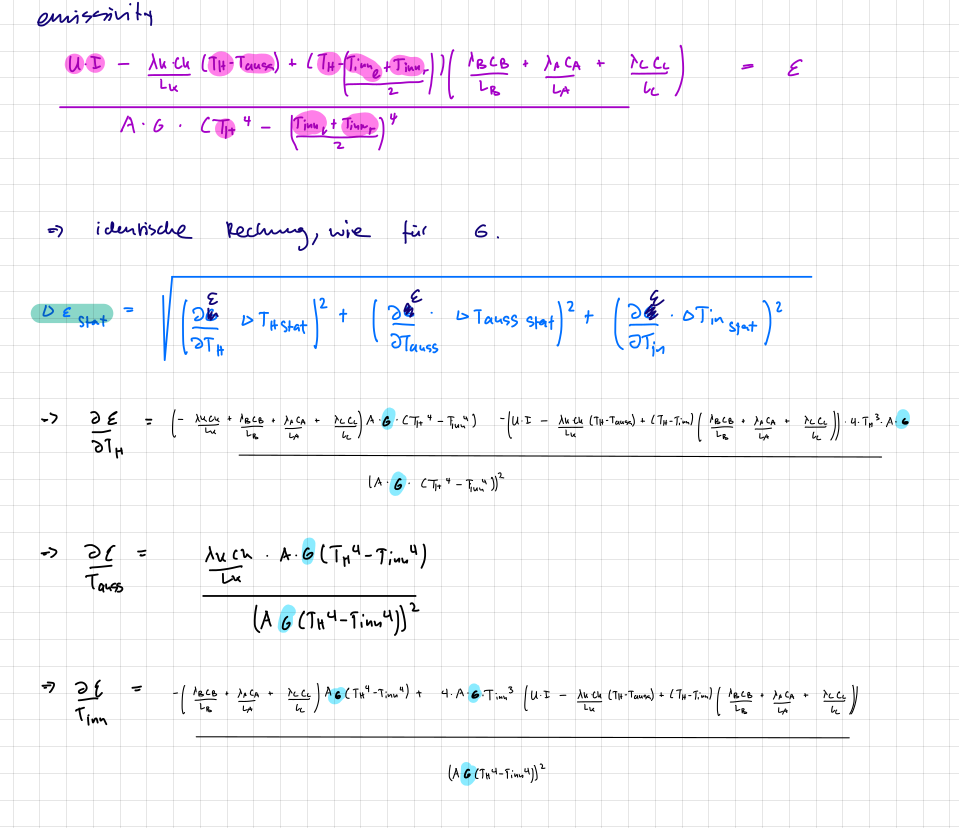

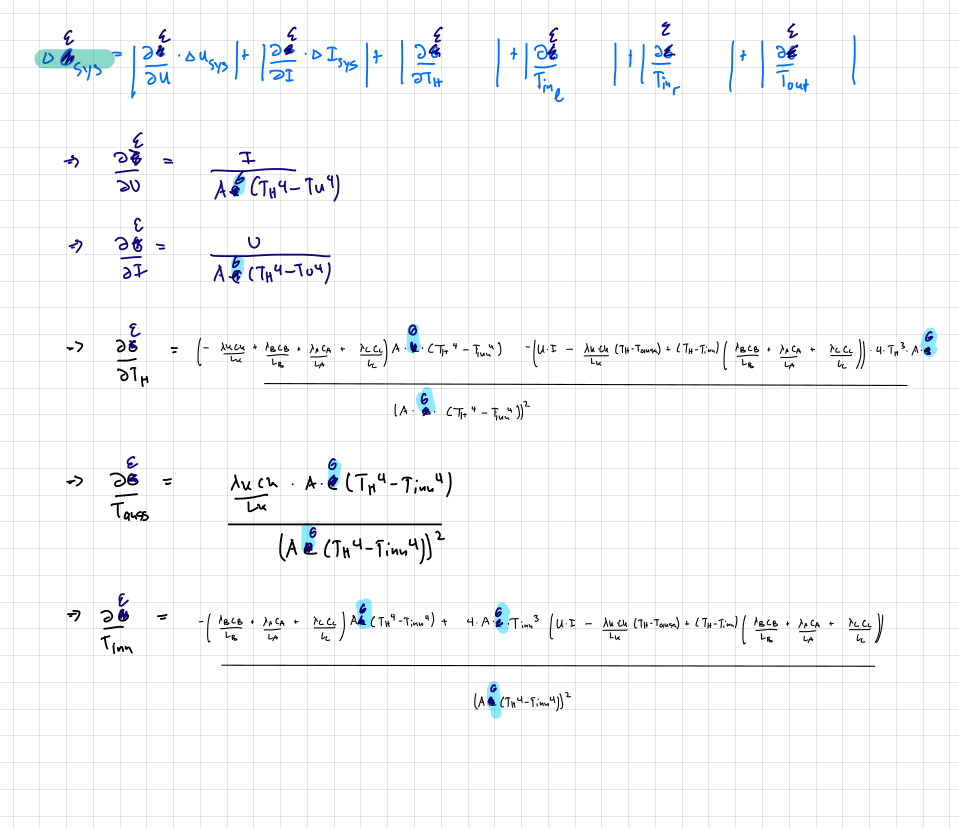

In [ ]:
# statistisch

sigma = 5.670367e-8

u = U*I - k_block*(T_h - T_auss) + (T_h - T_inn)*(b_block + a_block + c_block)
v = A*sigma*(T_h**4 - T_inn**4)

def Adepsilon_dT_H(T_H_stat):
    return ((((-k_block + b_block + a_block + c_block)*(v) - (u)*4*A*sigma*T_h**4)/(v**2)) * (T_H_stat))
    
def Adepsilon_dT_auss(T_auss_stat):   
    return ((k_block*v) / (v**2)) * (T_auss_stat)
    
def Adepsilon_dT_inn(T_inn_stat):
    return (((-(b_block + a_block + c_block)*v + (4*A*sigma*((T_inn)**3))*u) / (v**2)) * (T_inn_stat))
    
def stat_complett_epsilon(f1,f2,f3):
    return np.sqrt(f1**2 + f2**2 + f3**2)

print(stat_complett_epsilon(Adepsilon_dT_H(T_H_stat), Adepsilon_dT_auss(T_auss_stat), Adepsilon_dT_inn(T_inn_stat)))


[0.02116921 0.00501848 0.00794211 0.00717262 0.00513651 0.00718856
 0.00640287]


In [ ]:
# systematisch

sigma = 5.670367e-8

u = U*I - k_block*(T_h - T_auss) + (T_h - T_inn)*(b_block + a_block + c_block)
v = A*sigma*(T_h**4 - T_inn**4)

def Bdepsilon_dI(I_sys):
    return ((I) / (v)) * (I_sys)
    
def Bdepsilon_dU(U_sys):
    return ((U) / (v)) * (U_sys)

def Bdepsilon_dT_H(T_H_sys):
    return ((((-k_block + b_block + a_block + c_block)*(v) - (u)*4*A*sigma*T_h**3)/(v**2)) * (T_H_sys))
    
def Bdepsilon_dT_auss(T_auss_sys):   
    return ((k_block*v) / (v**2)) * (T_auss_sys)
    
def Bdepsilon_dT_inn(T_inn_sys):
    return (((-(b_block + a_block + c_block)*v + (4*A*sigma*((T_inn)**3))*u) / (v**2)) * (T_inn_sys))



def sys_complett_epsilon(f1,f2,f3, f4, f5):
    return np.absolute(f1) + np.absolute(f2) + np.absolute(f3) + np.absolute(f4) + np.absolute(f5) 


# print(Bdepsilon_dT_H(T_H_sys))
# # print(Bdepsilon_dT_inn(T_inn_sys))



print(sys_complett_epsilon(Bdepsilon_dI(I_sys), Bdepsilon_dU(U_sys), Bdepsilon_dT_H(T_H_sys), Bdepsilon_dT_auss(T_auss_sys), Bdepsilon_dT_inn(T_inn_sys)))


[0.11982517 0.08972918 0.07194509 0.06051212 0.05226399 0.04659788
 0.04107469]


In [ ]:
# stat + sys zusammen

stat = stat_complett_epsilon(Adepsilon_dT_H(T_H_stat), Adepsilon_dT_auss(T_auss_stat), Adepsilon_dT_inn(T_inn_stat))
sys = sys_complett_epsilon(Bdepsilon_dI(I_sys), Bdepsilon_dU(U_sys), Bdepsilon_dT_H(T_H_sys), Bdepsilon_dT_auss(T_auss_sys), Bdepsilon_dT_inn(T_inn_sys))

print(stat + sys)

[0.14099438 0.09474766 0.07988719 0.06768474 0.0574005  0.05378644
 0.04747757]
